In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train=pd.read_csv("train_NIR5Yl1.csv")
test=pd.read_csv("test_8i3B3FC.csv")

In [3]:
print(train.shape)
print(test.shape)

(330045, 7)
(141448, 6)


In [4]:
train.isnull().sum()

ID            0
Tag           0
Reputation    0
Answers       0
Username      0
Views         0
Upvotes       0
dtype: int64

In [5]:
test.isnull().sum()

ID            0
Tag           0
Reputation    0
Answers       0
Username      0
Views         0
dtype: int64

In [6]:
train.describe()

,ID,Reputation,Answers,Username,Views,Upvotes
count,330045.000000,3.300450e+05,330045.000000,330045.000000,3.300450e+05,330045.000000
mean,235748.682789,7.773147e+03,3.917672,81442.888803,2.964507e+04,337.505358
std,136039.418471,2.706141e+04,3.579515,49215.100730,8.095646e+04,3592.441135
min,1.000000,0.000000e+00,0.000000,0.000000,9.000000e+00,0.000000
25%,117909.000000,2.820000e+02,2.000000,39808.000000,2.594000e+03,8.000000
50%,235699.000000,1.236000e+03,3.000000,79010.000000,8.954000e+03,28.000000
75%,353620.000000,5.118000e+03,5.000000,122559.000000,2.687000e+04,107.000000
max,471493.000000,1.042428e+06,76.000000,175738.000000,5.231058e+06,615278.000000


In [7]:
print("train",train.columns)
print("test",test.columns)
ID=test["ID"]

train Index(['ID', 'Tag', 'Reputation', 'Answers', 'Username', 'Views', 'Upvotes'], dtype='object')
test Index(['ID', 'Tag', 'Reputation', 'Answers', 'Username', 'Views'], dtype='object')


In [8]:
train.drop(['ID','Username'],axis=1,inplace=True)



In [9]:
test.drop(['ID','Username'],axis=1,inplace=True)

In [10]:
train.head()

,Tag,Reputation,Answers,Views,Upvotes
0,a,3942.0,2.0,7855.0,42.0
1,a,26046.0,12.0,55801.0,1175.0
2,c,1358.0,4.0,8067.0,60.0
3,a,264.0,3.0,27064.0,9.0
4,c,4271.0,4.0,13986.0,83.0


In [11]:
df_mean=train.groupby(['Tag']).mean()

In [12]:
df_mean

,Reputation,Answers,Views,Upvotes
Tag,,,,
a,6065.168102,4.259189,31800.916327,316.460136
c,10566.420657,4.047697,26746.676875,327.569916
h,6985.072116,3.778837,33948.958812,384.719704
i,5238.884290,3.679753,15806.680093,117.386636
j,8285.527730,4.347256,43291.211236,540.364686
o,5656.755603,3.380654,13504.645538,112.157294
p,8062.053033,3.977077,33184.984334,407.351971
r,5290.282109,2.304292,12033.055940,79.027246
s,6545.661622,3.600866,25807.082965,237.031385


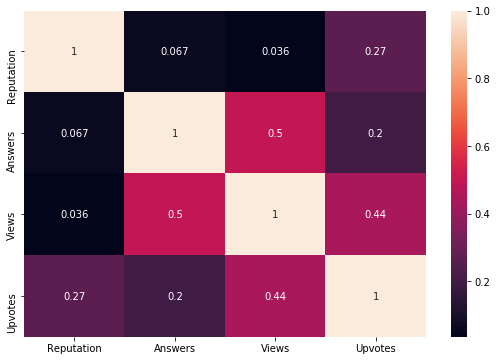

In [13]:
plt.figure(figsize=(9,6))
heatmap=train.corr()
sns.heatmap(heatmap,annot=True)

Text(0, 0.5, 'Views')

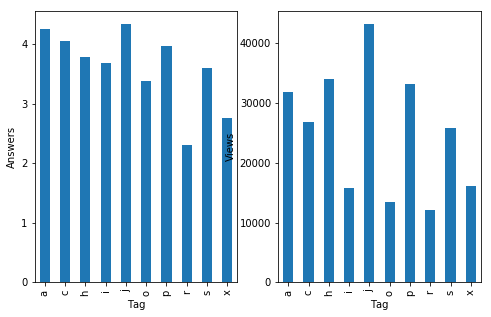

In [14]:
plt.figure(figsize=(8,5))
plt.subplot(1,2,1)
df_mean["Answers"].plot(kind="bar")
plt.ylabel("Answers")
plt.subplot(1,2,2)
df_mean["Views"].plot(kind="bar")
plt.ylabel("Views")

In [15]:
# from sklearn.preprocessing import Binarizer
# bn=Binarizer(threshold=4)
# pd_watch=bn.transform([train["Answers"]])[0]
# pd_watchtest=bn.transform([test["Answers"]])[0]
# train["pd_watch"]=pd_watch
# test["pd_watchtest"]=pd_watchtest
# train.head()

In [16]:
test.head()

,Tag,Reputation,Answers,Views
0,a,5645.0,3.0,33200.0
1,c,24511.0,6.0,2730.0
2,i,927.0,1.0,21167.0
3,i,21.0,6.0,18528.0
4,i,4475.0,10.0,57240.0


In [17]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
train["Tag"]=le.fit_transform(train["Tag"])


In [18]:
test["Tag"]=le.fit_transform(test["Tag"])
test.head()

,Tag,Reputation,Answers,Views
0,0,5645.0,3.0,33200.0
1,1,24511.0,6.0,2730.0
2,3,927.0,1.0,21167.0
3,3,21.0,6.0,18528.0
4,3,4475.0,10.0,57240.0


In [19]:
x=train.drop("Upvotes",axis=1)
y=train["Upvotes"]

In [20]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
test=sc.fit_transform(test)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [21]:
# from sklearn.linear_model import LinearRegression
# lr=LinearRegression()
# lr.fit(x,y)


In [22]:
# submission=lr.predict(test)

In [23]:
# from sklearn.tree import DecisionTreeRegressor
# regressor = DecisionTreeRegressor()
# regressor.fit(x, y)

# # Predicting a new result
# y_pred = regressor.predict(test)
# y_pred

In [24]:
# from sklearn.ensemble import RandomForestRegressor
# regressor = RandomForestRegressor(n_estimators = 100)
# regressor.fit(x, y)

# # Predicting a new result
# y_pred1 = regressor.predict(test)


In [25]:
# y_pred1

In [26]:
from sklearn.ensemble import GradientBoostingRegressor
from time import time
start = time()
est=GradientBoostingRegressor(n_estimators=400, max_depth=5, loss='ls',min_samples_split=2,learning_rate=0.1).fit(x, y)
end=time()
tra_time_g=end-start


pred = est.predict(test)

In [28]:
df=pd.DataFrame({"ID":ID,"Upvotes":pred})
df.to_csv("test_submissiongradient1.csv",index=False)